# Linear Regression

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

In [3]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [4]:
# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [5]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [5/60], Loss: 41.2294
Epoch [10/60], Loss: 16.9871
Epoch [15/60], Loss: 7.1656
Epoch [20/60], Loss: 3.1863
Epoch [25/60], Loss: 1.5738
Epoch [30/60], Loss: 0.9201
Epoch [35/60], Loss: 0.6547
Epoch [40/60], Loss: 0.5468
Epoch [45/60], Loss: 0.5026
Epoch [50/60], Loss: 0.4842
Epoch [55/60], Loss: 0.4763
Epoch [60/60], Loss: 0.4727


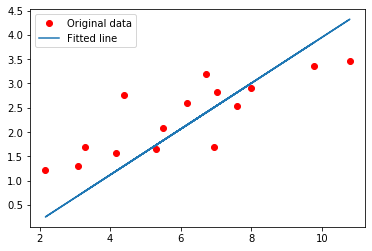

In [6]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

# logistic Regression

In [7]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [8]:
# Hyper-parameters 
input_size = 28 * 28    # 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [9]:
# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [10]:
# Logistic regression model
model = nn.Linear(input_size, num_classes)

# Loss and optimizer
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [11]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, input_size)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 2.2256
Epoch [1/5], Step [200/600], Loss: 2.1370
Epoch [1/5], Step [300/600], Loss: 2.0095
Epoch [1/5], Step [400/600], Loss: 1.9410
Epoch [1/5], Step [500/600], Loss: 1.8547
Epoch [1/5], Step [600/600], Loss: 1.8080
Epoch [2/5], Step [100/600], Loss: 1.7334
Epoch [2/5], Step [200/600], Loss: 1.6616
Epoch [2/5], Step [300/600], Loss: 1.6308
Epoch [2/5], Step [400/600], Loss: 1.5190
Epoch [2/5], Step [500/600], Loss: 1.5292
Epoch [2/5], Step [600/600], Loss: 1.5024
Epoch [3/5], Step [100/600], Loss: 1.3856
Epoch [3/5], Step [200/600], Loss: 1.2991
Epoch [3/5], Step [300/600], Loss: 1.3667
Epoch [3/5], Step [400/600], Loss: 1.3003
Epoch [3/5], Step [500/600], Loss: 1.3011
Epoch [3/5], Step [600/600], Loss: 1.3345
Epoch [4/5], Step [100/600], Loss: 1.2729
Epoch [4/5], Step [200/600], Loss: 1.2387
Epoch [4/5], Step [300/600], Loss: 1.2031
Epoch [4/5], Step [400/600], Loss: 1.1419
Epoch [4/5], Step [500/600], Loss: 1.0957
Epoch [4/5], Step [600/600], Loss:

In [12]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Accuracy of the model on the 10000 test images: 82 %


In [13]:
# Feed Forward NN

In [14]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [15]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [16]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [17]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [18]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

In [19]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.4591
Epoch [1/5], Step [200/600], Loss: 0.2855
Epoch [1/5], Step [300/600], Loss: 0.1880
Epoch [1/5], Step [400/600], Loss: 0.1510
Epoch [1/5], Step [500/600], Loss: 0.2956
Epoch [1/5], Step [600/600], Loss: 0.0951
Epoch [2/5], Step [100/600], Loss: 0.2085
Epoch [2/5], Step [200/600], Loss: 0.0763
Epoch [2/5], Step [300/600], Loss: 0.1956
Epoch [2/5], Step [400/600], Loss: 0.1513
Epoch [2/5], Step [500/600], Loss: 0.0885
Epoch [2/5], Step [600/600], Loss: 0.0549
Epoch [3/5], Step [100/600], Loss: 0.0816
Epoch [3/5], Step [200/600], Loss: 0.0989
Epoch [3/5], Step [300/600], Loss: 0.0779
Epoch [3/5], Step [400/600], Loss: 0.0317
Epoch [3/5], Step [500/600], Loss: 0.1032
Epoch [3/5], Step [600/600], Loss: 0.0227
Epoch [4/5], Step [100/600], Loss: 0.1377
Epoch [4/5], Step [200/600], Loss: 0.0546
Epoch [4/5], Step [300/600], Loss: 0.0252
Epoch [4/5], Step [400/600], Loss: 0.0134
Epoch [4/5], Step [500/600], Loss: 0.0703
Epoch [4/5], Step [600/600], Loss:

In [20]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Accuracy of the network on the 10000 test images: 97.95 %
